# Approval ratings

In this script, I want to evaluate the data on the approval ratings of Trump during his presidency, the public's approval rating of the Covid policies, and how concerned the public was about Covid over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Trump

The data on Trump's approval ratings over time was taken from [Gallup](https://news.gallup.com/poll/203198/presidential-approval-ratings-donald-trump.aspx).

In [2]:
df_t = pd.read_csv('../data_raw/approval_trump.csv',skiprows=2)
df_t.columns = ['Date','Approval Trump','Percentage']
del df_t['Percentage']
#df_t

In [3]:
dates = pd.period_range(start='2017-01',end='2020-10',freq='M',name='Monthly Frequency')
df_t.index = dates
del df_t['Date']
df_t

,Approval Trump
Monthly Frequency,
2017-01,45
2017-02,42
2017-03,39
2017-04,41
2017-05,41
2017-06,39
2017-07,38
2017-08,37
2017-09,38


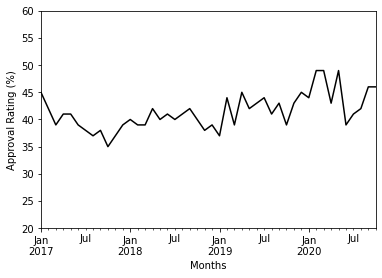

In [4]:
df_t.plot(legend=False,color='black')
plt.ylabel('Approval Rating (%)')
plt.xlabel('Months')
plt.ylim([20,60])
plt.savefig('../data_clean/approval_rating_trump.pdf',bbox_inches='tight')
plt.show()

## Covid Policy Approval

The COVID-19 policy approval rates were taken from [FiveThirtyEight](https://github.com/fivethirtyeight/covid-19-polls). \
\
I only chose to use the data from YouGov, as there would be too many different sources otherwise. This way the observations were all calculated in the same way. 

In [23]:
df_p = pd.read_csv('../data_raw/corona_approval/covid_approval_polls_adjusted.csv')
df_p = df_p[df_p['pollster'].str.contains('YouGov')] # select the entries by YouGov
df_p['enddate'] = pd.to_datetime(df_p['enddate'])
df_p

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
0,Trump,11/25/2020,D,2/2/2020,2020-02-04,YouGov,B,523.0,a,0.542239,0.000000,NaN,NaN,21.0,51.0,19.830543,53.078680,14:35:09 25 Nov 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,Trump,11/25/2020,D,2/9/2020,2020-02-11,YouGov,B,510.0,a,0.448718,0.000000,NaN,NaN,19.0,50.0,17.830543,52.078680,14:35:09 25 Nov 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,Trump,11/25/2020,D,2/16/2020,2020-02-18,YouGov,B,529.0,a,0.393155,0.000000,NaN,NaN,11.0,59.0,9.830543,61.078680,14:35:09 25 Nov 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,Trump,11/25/2020,D,2/23/2020,2020-02-25,YouGov,B,525.0,a,0.342849,0.000000,NaN,NaN,14.0,56.0,12.830543,58.078680,14:35:09 25 Nov 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
7,Trump,11/25/2020,D,2/26/2020,2020-02-28,YouGov,B,324.0,a,0.199497,0.000000,NaN,NaN,18.0,70.0,16.830543,72.078680,14:35:09 25 Nov 2020,https://projects.fivethirtyeight.com/polls/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,Trump,11/25/2020,all,10/25/2020,2020-10-27,YouGov,B,1500.0,rv,0.384178,0.045608,NaN,NaN,42.0,56.0,41.935930,58.122177,14:35:20 25 Nov 2020,https://docs.cdn.yougov.com/nzc8dt85gn/econTab...
1986,Trump,11/25/2020,all,10/30/2020,2020-11-01,YouGov,B,1500.0,rv,0.446964,0.082413,NaN,NaN,43.0,55.0,42.935930,57.122177,14:35:20 25 Nov 2020,https://docs.cdn.yougov.com/9uv1pif4fj/2020110...
1991,Trump,11/25/2020,all,11/8/2020,2020-11-10,YouGov,B,1500.0,rv,0.581294,0.290189,NaN,NaN,44.0,54.0,43.935930,56.122177,14:35:20 25 Nov 2020,https://docs.cdn.yougov.com/9j7sr0my95/econTab...
1994,Trump,11/25/2020,all,11/13/2020,2020-11-16,YouGov,B,1000.0,rv,0.457346,0.327186,NaN,NaN,40.0,54.0,39.935930,56.122177,14:35:20 25 Nov 2020,https://docs.cdn.yougov.com/41uyvwxit7/tabs_HP...


Then, I had to group them by week and take the mean of each week. That is because the data was rather sporadic and not either daily or weekly.

In [24]:
app = pd.Series(df_p.resample('W', on='enddate').approve_adjusted.mean())
dis = pd.Series(df_p.resample('W', on='enddate').disapprove_adjusted.mean())
temp = pd.Series(df_p.resample('M', on='enddate').approve_adjusted.mean())

In [25]:
df_p = pd.DataFrame({
    'Approve Policies': app,
    'Disapprove Policies': dis
})
df_p = df_p.dropna()

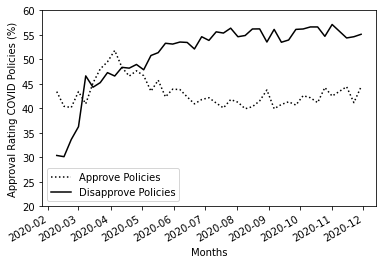

In [26]:
df_p['Approve Policies'].plot(legend=True,color='black',linestyle='dotted')
df_p['Disapprove Policies'].plot(legend=True,color='black')
plt.ylabel('Approval Rating COVID Policies (%)')
plt.xlabel('Months')
plt.ylim([20,60])
plt.savefig('../data_clean/approval_rating_covid_policies.pdf',bbox_inches='tight')
plt.show()

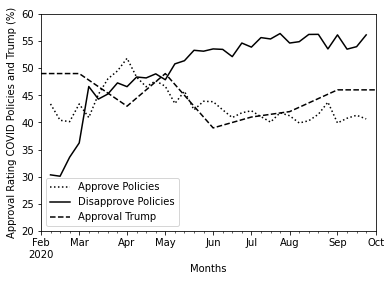

In [27]:
df_p['Approve Policies'][:-8].plot(legend=True,color='black',linestyle='dotted')
df_p['Disapprove Policies'][:-8].plot(legend=True,color='black')
df_t['Approval Trump'][37:].plot(legend=True,color='black',linestyle='dashed')
plt.ylabel('Approval Rating COVID Policies and Trump (%)')
plt.xlabel('Months')
plt.ylim([20,60])
plt.savefig('../data_clean/approval_rating_covid_policies2.pdf',bbox_inches='tight')
plt.show()

Now, I try to find the correlation between the Covid-policy approval rate and the Trump approval rate. I do this by using a very simple regression model. Of course this model is prone to endogeneity. 
The model used is:

$\text{Approval Trump} = \beta_0 + \beta_1\text{Covid-policy approval} + \epsilon$

In [9]:
# set up the data frame
df_temp = pd.DataFrame({
    'Trump': pd.Series(df_t['Approval Trump'][37:])
})
a = np.array(temp[:-1].values.tolist())
df_temp.insert(1,'Covid',a,True)
df_temp

,Trump,Covid
37,49,42.156331
38,49,47.944625
39,43,48.021715
40,49,44.175562
41,39,42.367869
42,41,40.974513
43,42,41.502485
44,46,40.961886
45,46,42.372918


In [10]:
import statsmodels.formula.api as sm

corr = sm.ols(formula="Trump ~ Covid", data=df_temp).fit()
print(corr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Trump   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.6870
Date:                Sun, 11 Apr 2021   Prob (F-statistic):              0.435
Time:                        13:17:55   Log-Likelihood:                -23.810
No. Observations:                   9   AIC:                             51.62
Df Residuals:                       7   BIC:                             52.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1914     21.391      1.271      0.2

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Covid Concern

The COVID-19 concern data also comes from [FiveThirtyEight](https://github.com/fivethirtyeight/covid-19-polls).

In [42]:
df_c = pd.read_csv('../data_raw/corona_approval/covid_concern_polls_adjusted.csv')
df_c = df_c[df_c['pollster'].str.contains('Morning Consult')]
df_c['enddate'] = pd.to_datetime(df_c['enddate'])
df_c

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,...,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted,timestamp,url
0,concern-economy,11/25/2020,all,1/27/2020,2020-01-29,Morning Consult,B/C,2202.0,a,0.504621,...,19.0,33.0,23.0,11.0,15.953146,36.537139,26.423417,11.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
1,concern-economy,11/25/2020,all,1/31/2020,2020-02-02,Morning Consult,B/C,2202.0,a,0.456649,...,26.0,32.0,25.0,7.0,22.953146,35.537139,28.423417,7.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
2,concern-economy,11/25/2020,all,2/7/2020,2020-02-09,Morning Consult,B/C,2200.0,a,0.420355,...,23.0,32.0,24.0,9.0,19.953146,35.537139,27.423417,9.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
4,concern-economy,11/25/2020,all,2/24/2020,2020-02-26,Morning Consult,B/C,2200.0,a,0.286135,...,32.0,37.0,18.0,6.0,28.953146,40.537139,21.423417,6.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
6,concern-economy,11/25/2020,all,2/28/2020,2020-03-01,Morning Consult,B/C,2201.0,a,0.252536,...,38.0,33.0,13.0,5.0,34.953146,36.537139,16.423417,5.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
9,concern-economy,11/25/2020,all,3/3/2020,2020-03-05,Morning Consult,B/C,1990.0,rv,0.210487,...,38.0,37.0,12.0,5.0,34.953146,40.537139,15.423417,5.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
12,concern-economy,11/25/2020,all,3/6/2020,2020-03-09,Morning Consult,B/C,2200.0,a,0.218970,...,35.0,36.0,14.0,4.0,31.953146,39.537139,17.423417,4.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
14,concern-economy,11/25/2020,all,3/10/2020,2020-03-14,Morning Consult,B/C,2200.0,a,0.205262,...,45.0,31.0,8.0,5.0,41.953146,34.537139,11.423417,5.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
16,concern-economy,11/25/2020,all,3/12/2020,2020-03-13,Morning Consult,B/C,2201.0,a,0.203290,...,36.0,34.0,13.0,8.0,32.953146,37.537139,16.423417,8.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...
20,concern-economy,11/25/2020,all,3/13/2020,2020-03-16,Morning Consult,B/C,1986.0,rv,0.182806,...,55.0,29.0,6.0,3.0,51.953146,32.537139,9.423417,3.684543,14:35:22 25 Nov 2020,https://morningconsult.com/wp-content/uploads/...


In [43]:
very = pd.Series(df_c.resample('W', on='enddate').very_adjusted.mean())
somewhat = pd.Series(df_c.resample('W', on='enddate').somewhat_adjusted.mean())
nvery = pd.Series(df_c.resample('W', on='enddate').not_very_adjusted.mean())
nall = pd.Series(df_c.resample('W', on='enddate').not_at_all_adjusted.mean())
df_c = pd.DataFrame({
    'Very': very,
    'Somewhat': somewhat,
    'Not very': nvery,
    'Not at all': nall
})
df_c = df_c.dropna()

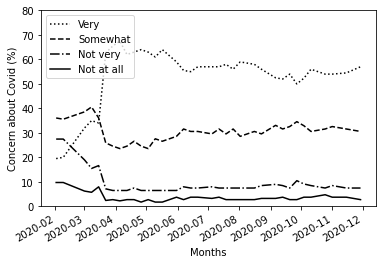

In [44]:
df_c['Very'].plot(legend=True,color='black',linestyle='dotted')
df_c['Somewhat'].plot(legend=True,color='black', linestyle='dashed')
df_c['Not very'].plot(legend=True,color='black', linestyle='dashdot')
df_c['Not at all'].plot(legend=True,color='black')
plt.ylabel('Concern about Covid (%)')
plt.xlabel('Months')
plt.ylim([0,80])
#plt.legend(loc='upper right')
plt.savefig('../data_clean/covid_concern.pdf',bbox_inches='tight')
plt.show()